In [1]:
import keras
from keras import layers
encoding_dim = 32  
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_img, decoded)

In [2]:
encoder = keras.Model(input_img, encoded)

In [3]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0926 - val_loss: 0.0916
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0925 - val_loss: 

In [9]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

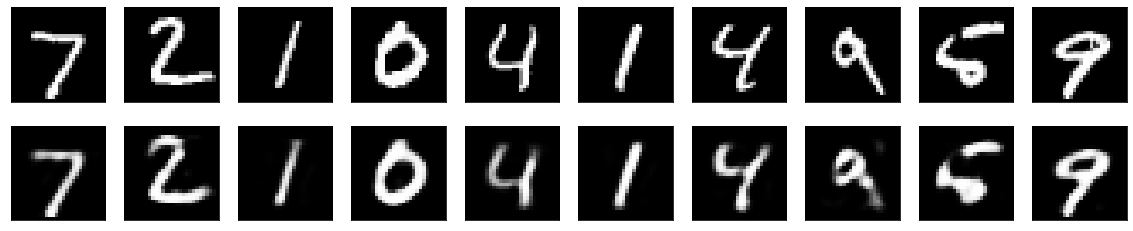

In [11]:
import matplotlib.pyplot as plt

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))

encoded = layers.Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

In [13]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [14]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 5s 18ms/step - loss: 0.3425 - val_loss: 0.1693
Epoch 2/100
235/235 [==============================] - 4s 17ms/step - loss: 0.1594 - val_loss: 0.1359
Epoch 3/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1336 - val_loss: 0.1235
Epoch 4/100
235/235 [==============================] - 4s 19ms/step - loss: 0.1230 - val_loss: 0.1169
Epoch 5/100
235/235 [==============================] - 5s 19ms/step - loss: 0.1170 - val_loss: 0.1125
Epoch 6/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1130 - val_loss: 0.1098
Epoch 7/100
235/235 [==============================] - 5s 20ms/step - loss: 0.1097 - val_loss: 0.1058
Epoch 8/100
235/235 [==============================] - 5s 22ms/step - loss: 0.1063 - val_loss: 0.1033
Epoch 9/100
235/235 [==============================] - 5s 21ms/step - loss: 0.1042 - val_loss: 0.1013
Epoch 10/100
235/235 [==============================] - 6s 24ms/step - loss: 0.102

235/235 [==============================] - 9s 37ms/step - loss: 0.0833 - val_loss: 0.0832
Epoch 81/100
235/235 [==============================] - 8s 35ms/step - loss: 0.0832 - val_loss: 0.0832
Epoch 82/100
235/235 [==============================] - 9s 37ms/step - loss: 0.0831 - val_loss: 0.0830
Epoch 83/100
235/235 [==============================] - 8s 36ms/step - loss: 0.0833 - val_loss: 0.0831
Epoch 84/100
235/235 [==============================] - 10s 42ms/step - loss: 0.0831 - val_loss: 0.0832
Epoch 85/100
235/235 [==============================] - 9s 38ms/step - loss: 0.0833 - val_loss: 0.0830
Epoch 86/100
235/235 [==============================] - 12s 52ms/step - loss: 0.0831 - val_loss: 0.0828
Epoch 87/100
235/235 [==============================] - 16s 70ms/step - loss: 0.0830 - val_loss: 0.0829
Epoch 88/100
235/235 [==============================] - 20s 85ms/step - loss: 0.0828 - val_loss: 0.0828
Epoch 89/100
235/235 [==============================] - 15s 65ms/step - loss: 0.08

In [15]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [21]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train, epochs=5, batch_size=128, shuffle=True, validation_data=(x_test, x_test), callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/5
469/469 [==============================] - 55s 118ms/step - loss: 0.1007 - val_loss: 0.0992
Epoch 2/5
469/469 [==============================] - 58s 124ms/step - loss: 0.1001 - val_loss: 0.0985
Epoch 3/5
469/469 [==============================] - 60s 129ms/step - loss: 0.0995 - val_loss: 0.0979
Epoch 4/5
469/469 [==============================] - 62s 131ms/step - loss: 0.0990 - val_loss: 0.0981
Epoch 5/5
469/469 [==============================] - 64s 136ms/step - loss: 0.0984 - val_loss: 0.0970


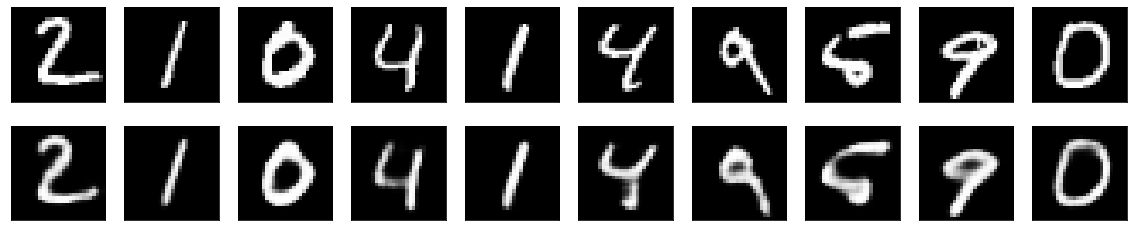

In [22]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

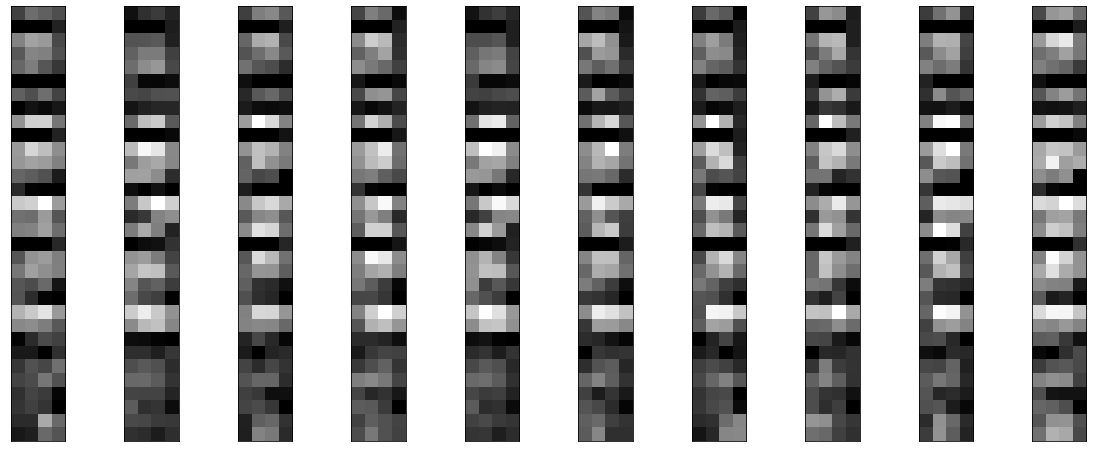

In [23]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

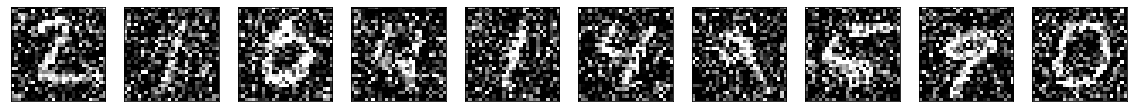

In [25]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [26]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
autoencoder.fit(x_train_noisy, x_train, epochs=15, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test), callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/15
469/469 [==============================] - 117s 249ms/step - loss: 0.1397 - val_loss: 0.1142
Epoch 2/15
469/469 [==============================] - 133s 283ms/step - loss: 0.1114 - val_loss: 0.1077
Epoch 3/15
469/469 [==============================] - 142s 303ms/step - loss: 0.1069 - val_loss: 0.1049
Epoch 4/15
469/469 [==============================] - 159s 339ms/step - loss: 0.1043 - val_loss: 0.1025
Epoch 5/15
469/469 [==============================] - 180s 385ms/step - loss: 0.1024 - val_loss: 0.1010
Epoch 6/15
469/469 [==============================] - 199s 425ms/step - loss: 0.1011 - val_loss: 0.0999
Epoch 7/15
469/469 [==============================] - 212s 451ms/step - loss: 0.1001 - val_loss: 0.0989
Epoch 8/15
469/469 [==============================] - 216s 461ms/step - loss: 0.0994 - val_loss: 0.0985
Epoch 9/15
469/469 [==============================] - 222s 473ms/step - loss: 0.0988 - val_loss: 0.0979
Epoch 10/15
469/469 [==============================] - 217s 463m

In [38]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

In [39]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

In [40]:
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

In [41]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [42]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train, epochs=100, batch_size=32, validation_data=(x_test, x_test))

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 222.5491 - val_loss: 168.0024
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 166.5193 - val_loss: 162.8530
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 161.9358 - val_loss: 159.6328
Epoch 4/100
1875/1875 [==============================] - 10s 5ms/step - loss: 158.6517 - val_loss: 157.3410
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 156.4369 - val_loss: 155.8750
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 155.4932 - val_loss: 154.6452
Epoch 7/100
1875/1875 [==============================] - 7s 3ms/step - loss: 154.0414 - val_loss: 154.0806
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 153.4487 - val_loss: 152.9272
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 152.9068 - val_loss: 152.6379
Epoch 10/100
1875/1875 [============

1875/1875 [==============================] - 9s 5ms/step - loss: 144.1947 - val_loss: 146.6843
Epoch 77/100
1875/1875 [==============================] - 10s 5ms/step - loss: 144.3975 - val_loss: 146.6080
Epoch 78/100
1875/1875 [==============================] - 9s 5ms/step - loss: 144.2955 - val_loss: 146.5458
Epoch 79/100
1875/1875 [==============================] - 9s 5ms/step - loss: 144.3088 - val_loss: 146.5728
Epoch 80/100
1875/1875 [==============================] - 9s 5ms/step - loss: 144.2659 - val_loss: 146.6482
Epoch 81/100
1875/1875 [==============================] - 9s 5ms/step - loss: 144.5546 - val_loss: 146.6973
Epoch 82/100
1875/1875 [==============================] - 9s 5ms/step - loss: 144.1873 - val_loss: 146.6806
Epoch 83/100
1875/1875 [==============================] - 9s 5ms/step - loss: 144.4159 - val_loss: 146.4903
Epoch 84/100
1875/1875 [==============================] - 10s 5ms/step - loss: 144.4194 - val_loss: 146.5715
Epoch 85/100
1875/1875 [===============

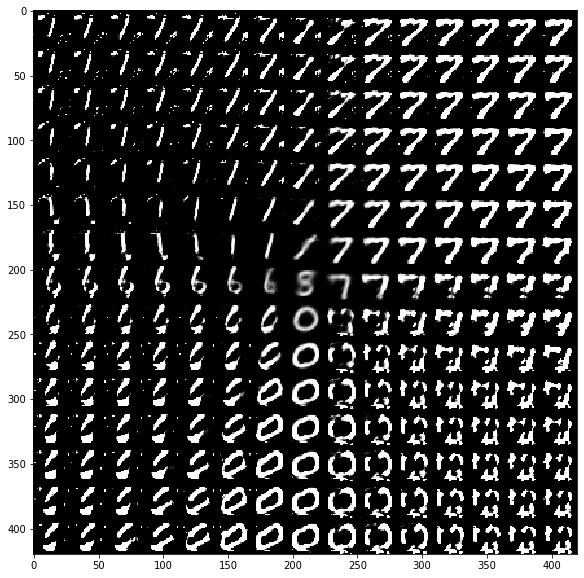

In [46]:
n = 15 
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()